<div style="padding: 50px; text-align: center; font-size: 40px; font-weight: bold;
    color: white; 
    background: linear-gradient(135deg, #1e3c72, #2a5298, #ff416c, #ff4b2b);
    background-size: 400% 400%;
    animation: gradientBG 8s ease infinite;
    border-radius: 15px;
    box-shadow: 0 0 20px rgba(0,0,0,0.3);">

  Credit Scoring

</div>

<style>
@keyframes gradientBG {
    0% {background-position: 0% 50%;}
    50% {background-position: 100% 50%;}
    100% {background-position: 0% 50%;}
}
</style>


# **1. Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [4]:
loan_data=pd.read_csv('loan_data_1248_with_missing.csv')
loan_data.head(20)

,income,loan_amount,term,credit_history,defaulted
0,60940.854754,17402.715471,60,1.0,1
1,49511.242579,6664.626123,36,0.0,0
2,63658.393686,17985.281393,60,0.0,1
3,79414.537415,21001.173770,36,1.0,0
4,47785.239255,4037.586145,36,1.0,0
5,NaN,18244.339419,36,1.0,0
6,NaN,23366.013955,60,1.0,1
7,65813.825125,8742.153888,60,1.0,0
8,43549.461053,26035.434321,36,1.0,1
9,61766.080785,18514.114056,60,1.0,0


# **2. Handle Missing Values**

## check how many null value i have 

In [5]:
loan_data.isnull().sum()

income            120
loan_amount       122
term                0
credit_history    112
defaulted           0
dtype: int64

##  Impute 'income' and 'loan_amount' with its median and 'credit_history' with its mode

In [6]:
loan_data['income'].fillna(loan_data['income'].median(), inplace=True)
loan_data['loan_amount'].fillna(loan_data['loan_amount'].median(), inplace=True)
loan_data['credit_history'].fillna(loan_data['credit_history'].mode()[0], inplace=True)

C:\Users\QUANTUM\AppData\Local\Temp\ipykernel_12696\2695214883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['income'].fillna(loan_data['income'].median(), inplace=True)
C:\Users\QUANTUM\AppData\Local\Temp\ipykernel_12696\2695214883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

## Verify missing values after imputation

In [7]:
print("\nMissing Values After Imputation:")
loan_data.isnull().sum()


Missing Values After Imputation:


income            0
loan_amount       0
term              0
credit_history    0
defaulted         0
dtype: int64

## Descriptive Statistics 

In [8]:
loan_data.describe()

,income,loan_amount,term,credit_history,defaulted
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,52500.945298,16167.787505,48.000000,0.771635,0.414263
std,16967.161028,5541.521139,12.004811,0.419948,0.492792
min,8000.000000,1000.000000,36.000000,0.000000,0.000000
25%,41673.912889,12772.722413,36.000000,1.000000,0.000000
50%,52462.564119,16052.247335,48.000000,1.000000,0.000000
75%,62987.634437,19610.211517,60.000000,1.000000,1.000000
max,121349.166832,35158.645407,60.000000,1.000000,1.000000


# **3. Exploratory Data Analysis (EDA) and Visualization**

In [22]:
loan_data.columns

Index(['income', 'loan_amount', 'term', 'credit_history', 'defaulted',
       'term_binary'],
      dtype='object')

In [23]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   income          1248 non-null   float64
 1   loan_amount     1248 non-null   float64
 2   term            1248 non-null   int64  
 3   credit_history  1248 non-null   float64
 4   defaulted       1248 non-null   int64  
 5   term_binary     1248 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 58.6 KB


In [9]:
sns.set_style('darkgrid')

##  Histograms for numerical features

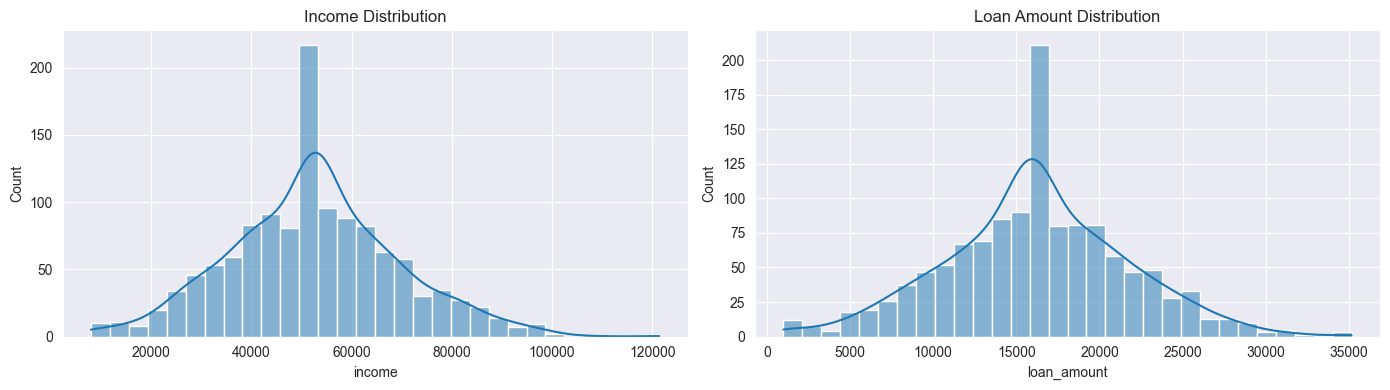

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(loan_data['income'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Income Distribution')
sns.histplot(loan_data['loan_amount'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Loan Amount Distribution')
plt.tight_layout()
plt.savefig('income_loan_amount_distribution.png')
plt.show()

## Count plot for Loan Term Distribution

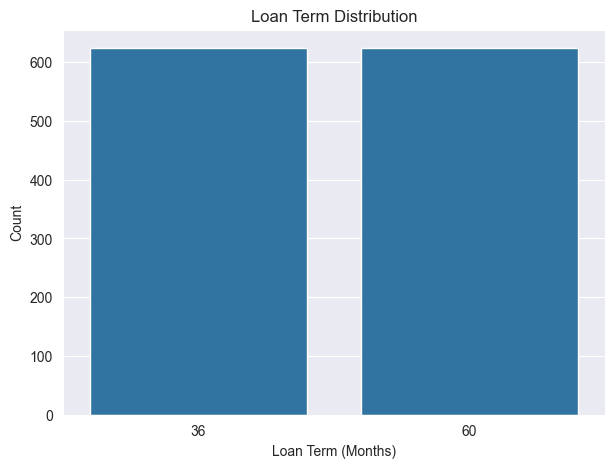

In [11]:
plt.figure(figsize=(7, 5))
sns.countplot(x='term', data=loan_data)
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Count')
plt.savefig('loan_term_distribution.png')
plt.show()

##  Count plot for Credit History vs Defaulted Loans

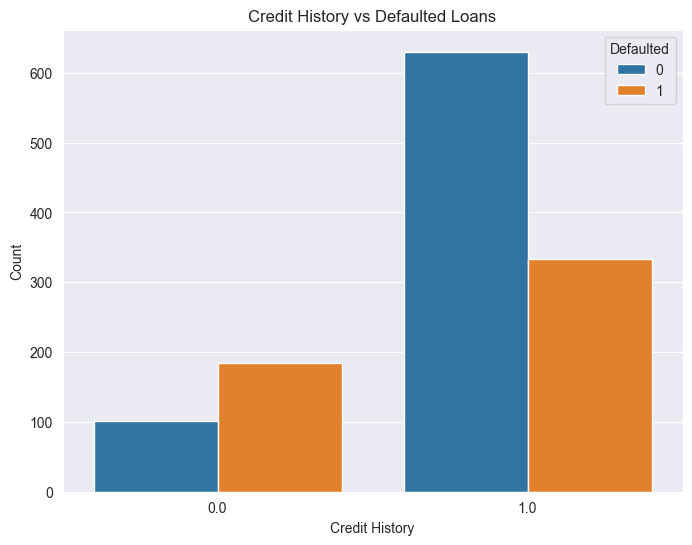

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='credit_history', hue='defaulted', data=loan_data)
plt.title('Credit History vs Defaulted Loans')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Defaulted')
plt.savefig('credit_history_defaulted.png')
plt.show()

## Correlation heatmap

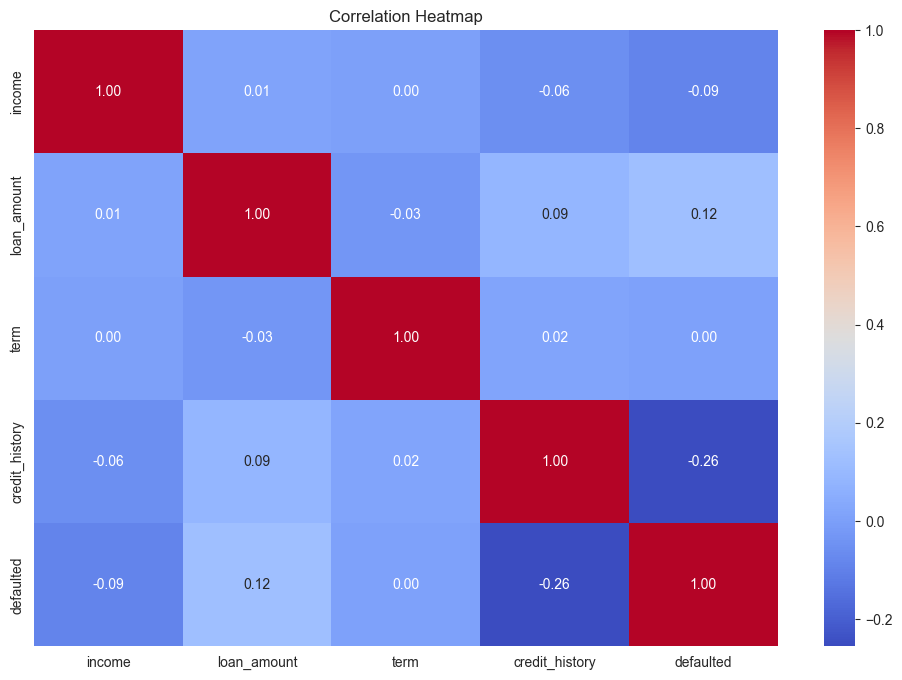

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(loan_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

# **4. Feature Engineering**

## Create 'term_binary' feature

In [16]:
loan_data['term_binary'] = loan_data['term'].apply(lambda x: 1 if x > 36 else 0)

## Apply logarithmic transformation to skewed numerical features

In [ ]:
loan_data['log_income'] = np.log(loan_data['income'])
loan_data['log_loan_amount'] = np.log(loan_data['loan_amount'])

## Visualize transformed numerical features

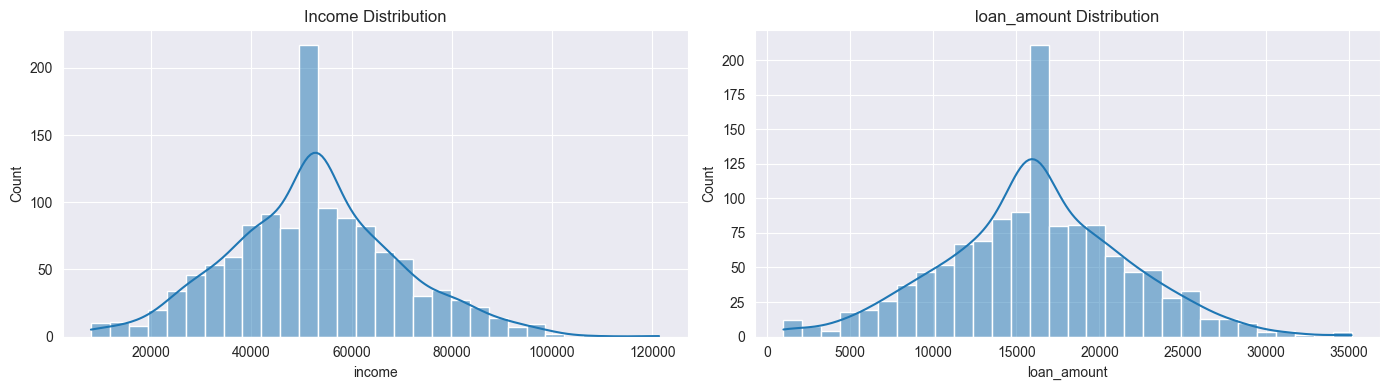

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(loan_data['income'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Income Distribution')
sns.histplot(loan_data['loan_amount'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('loan_amount Distribution')
plt.tight_layout()
plt.savefig('log_income_log_loan_amount_distribution.png')
plt.show()

## Visualize new 'term_binary' feature

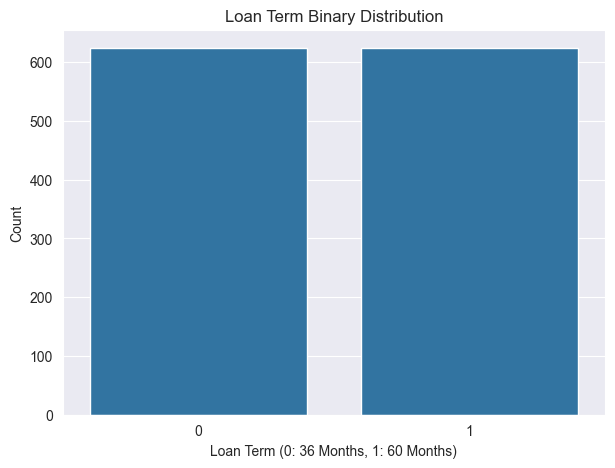

In [25]:
plt.figure(figsize=(7, 5))
sns.countplot(x='term_binary', data=loan_data)
plt.title('Loan Term Binary Distribution')
plt.xlabel('Loan Term (0: 36 Months, 1: 60 Months)')
plt.ylabel('Count')
plt.savefig('term_binary_distribution.png')
plt.show()

# **5. Prepare Data for Modeling**

##  Define features and target

In [28]:
features = ['income', 'loan_amount', 'term_binary', 'credit_history']
target = 'defaulted'

In [29]:
X = loan_data[features]
y = loan_data[target]

## Train-test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **6. Model Training and Evaluation**

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
}

In [ ]:
results = {}

for name, model in models.items():
    print(f"\n--- Model: {name} ---")
    ## Create pipeline: scale numerical features if Logistic Regression, else direct classifier
    if name == 'Logistic Regression':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
    else:
        pipeline = Pipeline([
            ('classifier', model)
        ])
    
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_rep)
    print("Confusion Matrix:")
    print(conf_matrix)

    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_rep,
        'confusion_matrix': conf_matrix,
        'y_pred': y_pred,
        'y_prob': y_prob,
        'pipeline': pipeline 
    }

    # Confusion Matrix Plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Defaulted', 'Defaulted'],
                yticklabels=['Not Defaulted', 'Defaulted'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_")}.png')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.savefig(f'roc_curve_{name.replace(" ", "_")}.png')
    plt.show()

## Plot ROC Curve

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic - {name}')
plt.legend(loc="lower right")
plt.savefig(f'roc_curve_{name.replace(" ", "_")}.png')
plt.show()

# **7. Hyperparameter Tuning**

In [ ]:
print("\n--- Hyperparameter Tuning for Logistic Regression ---")

## Define parameter grid for GridSearchCV

In [ ]:
param_grid_lr = [
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__solver': ['liblinear'], 'classifier__penalty': ['l1', 'l2']},
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__solver': ['lbfgs'], 'classifier__penalty': ['l2']}
]

## Create a pipeline for GridSearchCV, including the scaler

In [ ]:
pipeline_lr_grid = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

## Initialize GridSearchCV

In [ ]:
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}
grid_search_lr = GridSearchCV(pipeline_lr_grid, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

## Fit GridSearchCV to the training data

In [ ]:
grid_search_lr.fit(x_train, y_train)

## Print best parameters and best cross-validation score

In [ ]:
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best cross-validation accuracy for Logistic Regression: {grid_search_lr.best_score_:.4f}")

## Evaluate the best Logistic Regression model on the test set

In [ ]:
best_lr_pipeline = grid_search_lr.best_estimator_
y_pred_lr_tuned = best_lr_pipeline.predict(x_test)
y_prob_lr_tuned = best_lr_pipeline.predict_proba(x_test)[:, 1]

## Print evaluation metrics for the tuned model

In [ ]:
print(f"Tuned Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_lr_tuned):.4f}")
print("Tuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr_tuned))
print("Tuned Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_tuned))

## Plot Tuned Logistic Regression Confusion Matrix

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_tuned), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Defaulted', 'Defaulted'],
            yticklabels=['Not Defaulted', 'Defaulted'])
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_tuned_logistic_regression.png')
plt.show()

## Plot Tuned Logistic Regression ROC Curve

In [ ]:
fpr_lr_tuned, tpr_lr_tuned, _ = roc_curve(y_test, y_prob_lr_tuned)
roc_auc_lr_tuned = auc(fpr_lr_tuned, tpr_lr_tuned)
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr_tuned, tpr_lr_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Tuned Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('roc_curve_tuned_logistic_regression.png')
plt.show()

# **8. Feature Importances for Tree-based Models**

In [ ]:
for name in ['Decision Tree', 'Random Forest']:
    print(f"\n--- Feature Importances for {name} ---")
    classifier_model = results[name]['pipeline'].named_steps['classifier']
    feature_importances = classifier_model.feature_importances_

    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importances - {name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig(f'feature_importances_{name.replace(" ", "_")}.png')
    plt.show()
